In [ ]:
# Import Libraries
import numpy as np
import pandas as pd # untuk menampilkan data
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
df= pd.read_csv("https://raw.githubusercontent.com/Asfilia/Dataset/master/Banjir.csv")

In [ ]:
df

,Tanggal,Waktu,Katulampa,Pos Depok,Manggarai,Istiqlal,Jembatan Merah,Flusing Ancol,Marina Ancol,Status Banjir
0,1/1/2020,0:00:00,47,167,639,206,164,180,159,0
1,1/1/2020,1:00:00,44,75,680,215,175,181,114,0
2,1/1/2020,2:00:00,42,159,735,187,192,197,169,0
3,1/1/2020,3:00:00,41,161,845,238,223,203,178,0
4,1/1/2020,4:00:00,40,154,889,280,262,223,191,1
...,...,...,...,...,...,...,...,...,...,...
619,7/12/2020,19:00:00,46,140,650,170,159,173,171,0
620,7/12/2020,20:00:00,45,139,645,162,140,169,168,0
621,7/12/2020,21:00:00,44,138,635,161,154,164,162,0
622,7/12/2020,22:00:00,44,138,625,160,149,156,157,0


In [ ]:
##Normalisasi Perkolom
for column in df.iloc[:,2:9]:
  df.iloc[:,2:9] = ((0.8*(df.iloc[:,2:9] - df.iloc[:,2:9].min())) / (df.iloc[:,2:9].max() - df.iloc[:,2:9].min())) + 0.1

In [ ]:
df.head()

,Tanggal,Waktu,Katulampa,Pos Depok,Manggarai,Istiqlal,Jembatan Merah,Flusing Ancol,Marina Ancol,Status Banjir
0,1/1/2020,0:00:00,0.228696,0.336522,0.612211,0.485657,0.366667,0.308835,0.363087,0
1,1/1/2020,1:00:00,0.218261,0.123188,0.648295,0.514343,0.412500,0.312048,0.121477,0
2,1/1/2020,2:00:00,0.211304,0.317971,0.696700,0.425100,0.483333,0.363454,0.416779,0
3,1/1/2020,3:00:00,0.207826,0.322609,0.793509,0.587649,0.612500,0.382731,0.465101,0
4,1/1/2020,4:00:00,0.204348,0.306377,0.832233,0.721514,0.775000,0.446988,0.534899,1


In [ ]:
display(df.dtypes)

Tanggal            object
Waktu              object
Katulampa         float64
Pos Depok         float64
Manggarai         float64
Istiqlal          float64
Jembatan Merah    float64
Flusing Ancol     float64
Marina Ancol      float64
Status Banjir       int64
dtype: object

In [ ]:
X = df.iloc[:,0:9]

X.head()

,Tanggal,Waktu,Katulampa,Pos Depok,Manggarai,Istiqlal,Jembatan Merah,Flusing Ancol,Marina Ancol
0,1/1/2020,0:00:00,0.228696,0.336522,0.612211,0.485657,0.366667,0.308835,0.363087
1,1/1/2020,1:00:00,0.218261,0.123188,0.648295,0.514343,0.412500,0.312048,0.121477
2,1/1/2020,2:00:00,0.211304,0.317971,0.696700,0.425100,0.483333,0.363454,0.416779
3,1/1/2020,3:00:00,0.207826,0.322609,0.793509,0.587649,0.612500,0.382731,0.465101
4,1/1/2020,4:00:00,0.204348,0.306377,0.832233,0.721514,0.775000,0.446988,0.534899


In [ ]:
Y = df.iloc[:,-1]

Y.head()

0    0
1    0
2    0
3    0
4    1
Name: Status Banjir, dtype: int64

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state=0)

In [ ]:
x_train_split = np.array(x_train.iloc[:, 2:9])
x_test_split = np.array(x_test.iloc[:, 2:9])
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(units= 4, activation='sigmoid', use_bias=True, name='FirstLayer'),
                                    tf.keras.layers.Dense(units= 3, activation='sigmoid', use_bias=True),
                                    tf.keras.layers.Dense(units= 1, activation='sigmoid', use_bias=True, name='LastLayer')
])

In [ ]:
7## opt = keras.optimizers.Adam(learning_rate=0.01)
opt = keras.optimizers.Adam(learning_rate=0.08)

model.compile(
    optimizer = opt,
    loss = 'mse',
    metrics = ['accuracy'],
)

In [ ]:
hist = model.fit(
    x_train_split, y_train, epochs=125, validation_split = 0.4
)

Epoch 1/125
7/7 [==============================] - 1s 78ms/step - loss: 0.2525 - accuracy: 0.5357 - val_loss: 0.2496 - val_accuracy: 0.4733
Epoch 2/125
7/7 [==============================] - 0s 19ms/step - loss: 0.2491 - accuracy: 0.5491 - val_loss: 0.2473 - val_accuracy: 0.6533
Epoch 3/125
7/7 [==============================] - 0s 21ms/step - loss: 0.2461 - accuracy: 0.6696 - val_loss: 0.2461 - val_accuracy: 0.6667
Epoch 4/125
7/7 [==============================] - 0s 31ms/step - loss: 0.2492 - accuracy: 0.5402 - val_loss: 0.2431 - val_accuracy: 0.6133
Epoch 5/125
7/7 [==============================] - 0s 16ms/step - loss: 0.2442 - accuracy: 0.5848 - val_loss: 0.2537 - val_accuracy: 0.4600
Epoch 6/125
7/7 [==============================] - 0s 20ms/step - loss: 0.2384 - accuracy: 0.6250 - val_loss: 0.2387 - val_accuracy: 0.6133
Epoch 7/125
7/7 [==============================] - 0s 15ms/step - loss: 0.2371 - accuracy: 0.5893 - val_loss: 0.2378 - val_accuracy: 0.6533
Epoch 8/125
7/7 [===

In [ ]:
Score = model.evaluate(
    x_test_split, y_test, verbose = 0
)

**Akses Bias & Weight**

In [ ]:
for layer in model.layers:
  print(layer.name, layer)

FirstLayer <keras.layers.core.dense.Dense object at 0x7f7ce948ba10>
dense_3 <keras.layers.core.dense.Dense object at 0x7f7ce948b150>
LastLayer <keras.layers.core.dense.Dense object at 0x7f7ce94ac950>


In [ ]:
# firstlayer by name
print("FirstLayer")
print((model.get_layer("FirstLayer").weights))

FirstLayer
[<tf.Variable 'FirstLayer/kernel:0' shape=(7, 4) dtype=float32, numpy=
array([[  2.8012338 ,  -2.3286474 ,   3.3661108 ,   1.8331565 ],
       [  0.65820175,   2.668151  ,  -2.699652  ,  -2.153234  ],
       [  1.9133686 ,  -1.7408229 ,   0.5662134 ,   1.4824766 ],
       [ -1.0576004 ,   4.42672   ,  -2.8528857 ,  -2.7066705 ],
       [-12.5305805 ,   9.325756  ,  -3.8597534 ,  -8.883061  ],
       [ -8.352688  ,   2.1229482 ,  10.074187  ,  -4.072807  ],
       [  3.1360466 ,   0.39701283,  -3.6662605 ,  -0.15112562]],
      dtype=float32)>, <tf.Variable 'FirstLayer/bias:0' shape=(4,) dtype=float32, numpy=array([ 2.716576 , -1.363681 , -1.8413448,  1.7040043], dtype=float32)>]


In [ ]:
# secondlayer by name
"""print("SecondLayer")
print((model.get_layer("SecondLayer").weights))"""

'print("SecondLayer")\nprint((model.get_layer("SecondLayer").weights))'

In [ ]:
# lastlayer by name
print("LastLayer")
print((model.get_layer("LastLayer").weights))

LastLayer
[<tf.Variable 'LastLayer/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[-2.684956 ],
       [ 2.604868 ],
       [-4.2563634]], dtype=float32)>, <tf.Variable 'LastLayer/bias:0' shape=(1,) dtype=float32, numpy=array([-0.86999685], dtype=float32)>]


In [ ]:
y_pred = model.predict(x_test_split)

print(y_pred)

8/8 [==============================] - 0s 2ms/step
[[0.05977007]
 [0.8416915 ]
 [0.84164345]
 [0.8134826 ]
 [0.8404791 ]
 [0.781033  ]
 [0.8423547 ]
 [0.83714336]
 [0.06062657]
 [0.03930911]
 [0.8157864 ]
 [0.8356082 ]
 [0.8334926 ]
 [0.25120705]
 [0.8422493 ]
 [0.7088138 ]
 [0.01677311]
 [0.8004871 ]
 [0.84224015]
 [0.8162133 ]
 [0.05609126]
 [0.0479297 ]
 [0.81554866]
 [0.06329457]
 [0.05082918]
 [0.5954435 ]
 [0.02849259]
 [0.04908892]
 [0.8405176 ]
 [0.82814854]
 [0.16079272]
 [0.0547661 ]
 [0.05672782]
 [0.74357396]
 [0.8433864 ]
 [0.0370232 ]
 [0.81415015]
 [0.01706221]
 [0.24710765]
 [0.8415838 ]
 [0.7578869 ]
 [0.05095147]
 [0.1601614 ]
 [0.82907313]
 [0.453449  ]
 [0.00221955]
 [0.8356888 ]
 [0.83238155]
 [0.0487364 ]
 [0.8435971 ]
 [0.04427196]
 [0.04415191]
 [0.5033567 ]
 [0.83592206]
 [0.69280756]
 [0.81135947]
 [0.00619865]
 [0.03147835]
 [0.8406699 ]
 [0.8268942 ]
 [0.836784  ]
 [0.0459613 ]
 [0.7651783 ]
 [0.7756591 ]
 [0.24287044]
 [0.79377437]
 [0.84286386]
 [0.8317219

In [ ]:
for i in range(y_pred.shape[0]):
  if y_pred[i] > 0.5:
    y_pred[i]=1
  else:
    y_pred[i]=0

In [ ]:
## akurasi
print('Test loss MSE:', Score[0])

Test loss MSE: 0.14072111248970032


In [ ]:
labels = ['Tidak Banjir', 'Banjir']

In [ ]:
from pandas.core.indexing import convert_from_missing_indexer_tuple
cm = confusion_matrix(y_pred, y_test)

print(cm)

[[ 81  12]
 [ 31 126]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.72      0.87      0.79        93
         1.0       0.91      0.80      0.85       157

    accuracy                           0.83       250
   macro avg       0.82      0.84      0.82       250
weighted avg       0.84      0.83      0.83       250



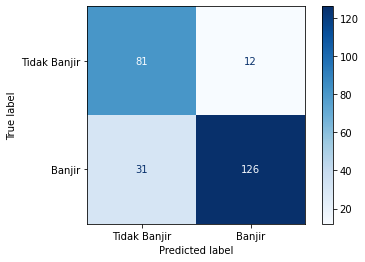

In [ ]:
disp = ConfusionMatrixDisplay(cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
loss = hist.history['loss']
loss = np.array(loss)
loss = np.reshape(loss, (-1, 1))

val_loss = hist.history['val_loss']
val_loss = np.array(val_loss)
val_loss = np.reshape(val_loss, (-1, 1))

acc = hist.history['accuracy']
acc = np.array(acc)
acc = np.reshape(acc, (-1, 1))

val_accuracy = hist.history['val_accuracy']
val_accuracy = np.array(val_accuracy)
val_accuracy = np.reshape(val_accuracy, (-1, 1))

loss

array([[0.25249761],
       [0.24906349],
       [0.24614264],
       [0.2492325 ],
       [0.24419244],
       [0.23840573],
       [0.23711993],
       [0.2356488 ],
       [0.23070738],
       [0.21943189],
       [0.21261342],
       [0.21333514],
       [0.20279387],
       [0.19716558],
       [0.1929356 ],
       [0.19193639],
       [0.1896757 ],
       [0.18343438],
       [0.18134747],
       [0.17939267],
       [0.18055476],
       [0.17798422],
       [0.17740236],
       [0.17543475],
       [0.17374054],
       [0.17385325],
       [0.17353618],
       [0.17143142],
       [0.1718397 ],
       [0.17199329],
       [0.17486982],
       [0.16828482],
       [0.16987325],
       [0.17196712],
       [0.17282644],
       [0.16899003],
       [0.17193057],
       [0.16891813],
       [0.16687797],
       [0.16718471],
       [0.16831419],
       [0.16522446],
       [0.16655895],
       [0.17143811],
       [0.1690881 ],
       [0.16985027],
       [0.16538158],
       [0.163

In [ ]:
loss_a = pd.DataFrame(loss, columns = ['Loss'])
loss_acc = np.column_stack([loss, val_loss, acc, val_accuracy])
loss_acc = pd.DataFrame(loss_acc, columns = ['Loss', 'Validasi Loss', 'Accuracy', 'Validasi Accuracy'])
# Specify the name of the excel file
nilaiLoss = "grafik_coba.xlsx"
  
# saving the excelsheet
loss_acc.to_excel(nilaiLoss)
print("Prediksi Status Banjir successfully exported into Excel File")

Prediksi Status Banjir successfully exported into Excel File


In [ ]:
loss_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Loss    125 non-null    float64
dtypes: float64(1)
memory usage: 1.1 KB


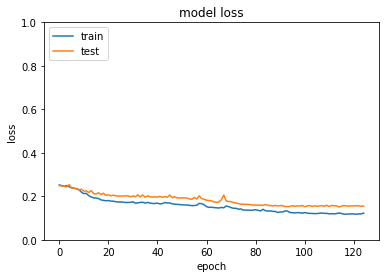

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0, 1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

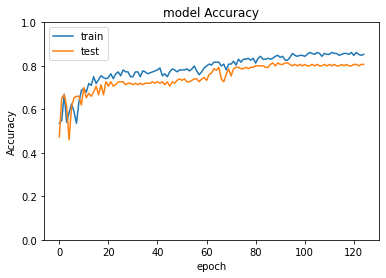

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.ylim(0, 1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = np.array(y_pred, dtype=np.int16)
y_test = np.reshape(y_test, (-1, 1))

In [ ]:
x_test = np.array(x_test)

In [ ]:
comb_array = np.column_stack([x_test, y_test, y_pred])

compare = pd.DataFrame(comb_array, columns = ['Tanggal',	'Waktu',	'Katulampa', 'Pos Depok',	'Manggarai',	'Istiqlal',	'Jembatan Merah',	'Flusing Ancol',	'Marina Ancol', 'Expected','Got'])
compare

,Tanggal,Waktu,Katulampa,Pos Depok,Manggarai,Istiqlal,Jembatan Merah,Flusing Ancol,Marina Ancol,Expected,Got
0,25/07/2020,20:00:00,0.1,0.111594,0.555886,0.549402,0.170833,0.283133,0.577852,0,0
1,4/5/2020,11:00:00,0.134783,0.174203,0.587569,0.536653,0.504167,0.350602,0.615436,1,1
2,13/8/2020,16:00:00,0.117391,0.206667,0.682618,0.782072,0.445833,0.408434,0.615436,1,1
3,5/6/2020,1:00:00,0.656522,0.162609,0.591969,0.629084,0.479167,0.331325,0.701342,1,1
4,13/8/2020,20:00:00,0.166087,0.327246,0.629813,0.664143,0.425,0.427711,0.685235,1,1
...,...,...,...,...,...,...,...,...,...,...,...
245,16/03/2020,17:00:00,0.218261,0.285507,0.641254,0.323108,0.266667,0.18996,0.228859,0,0
246,7/12/2020,7:00:00,0.277391,0.32029,0.652695,0.393227,0.391667,0.328112,0.422148,1,1
247,25/07/2020,0:00:00,0.1,0.113913,0.558526,0.549402,0.1625,0.276707,0.674497,0,0
248,1/1/2020,7:00:00,0.333043,0.429275,0.869197,0.769323,0.8125,0.440562,0.577852,1,1


In [ ]:
# Specify the name of the excel file
file_name = "Prediksi Status Banjir.xlsx"
  
# saving the excelsheet
compare.to_excel(file_name)
print("Prediksi Status Banjir successfully exported into Excel File")

Prediksi Status Banjir successfully exported into Excel File
